In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# XOR input (0 or 1)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
# XOR target output
y = np.array([0, 1, 1, 0])

In [ ]:
# MLP with 1 hidden layer of 5 neurons using tanh activation
model = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', solver='adam', 
                      learning_rate_init=0.1, max_iter=1000, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 100.00%


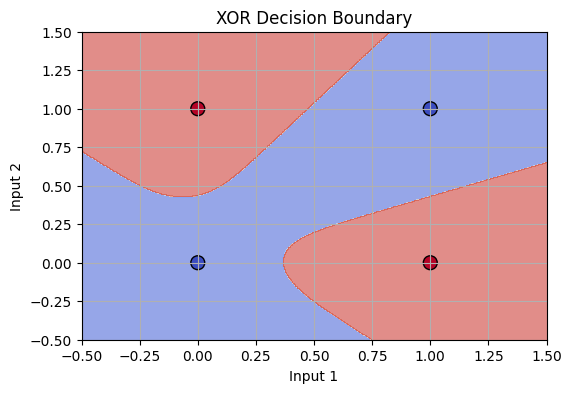

In [11]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
plt.title("XOR Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

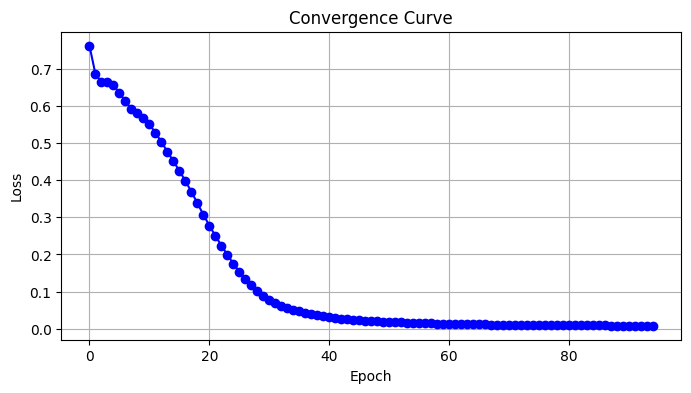

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(model.loss_curve_, color='blue', marker='o')
plt.title("Convergence Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


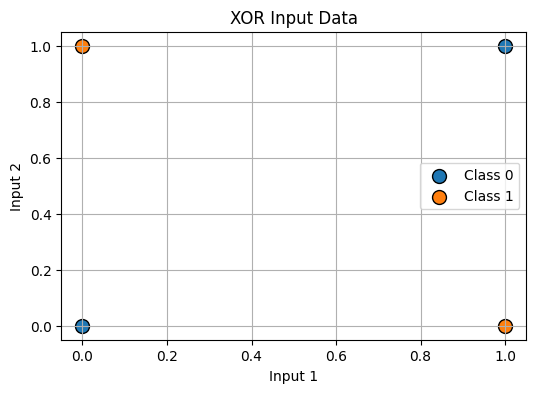

In [13]:
plt.figure(figsize=(6, 4))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1],
                label=f"Class {label}", s=100, edgecolors='black')
plt.title("XOR Input Data")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()
